# Load the Data

In [38]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

# set file path
filepath = "data/Churn-prediction/"

# Load train and test datasets
train_df = pd.read_csv(filepath + 'telecom_churn.csv')
train_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [9]:
x_df = train_df[train_df.columns[train_df.columns.isin(['AccountWeeks', 'ContractRenewal', 'DataPlan','DataUsage', 'CustServCalls', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'])]].copy()
y_df = train_df['Churn'].copy()
print(x_df.head())
print(y_df.head())

   AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0           128                1         1        2.7              1   
1           107                1         1        3.7              1   
2           137                1         0        0.0              0   
3            84                0         0        0.0              2   
4            75                0         0        0.0              3   

   DayCalls  MonthlyCharge  OverageFee  RoamMins  
0       110           89.0        9.87      10.0  
1       123           82.0        9.78      13.7  
2       114           52.0        6.06      12.2  
3        71           57.0        3.10       6.6  
4       113           41.0        7.42      10.1  
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


# Create Histograms

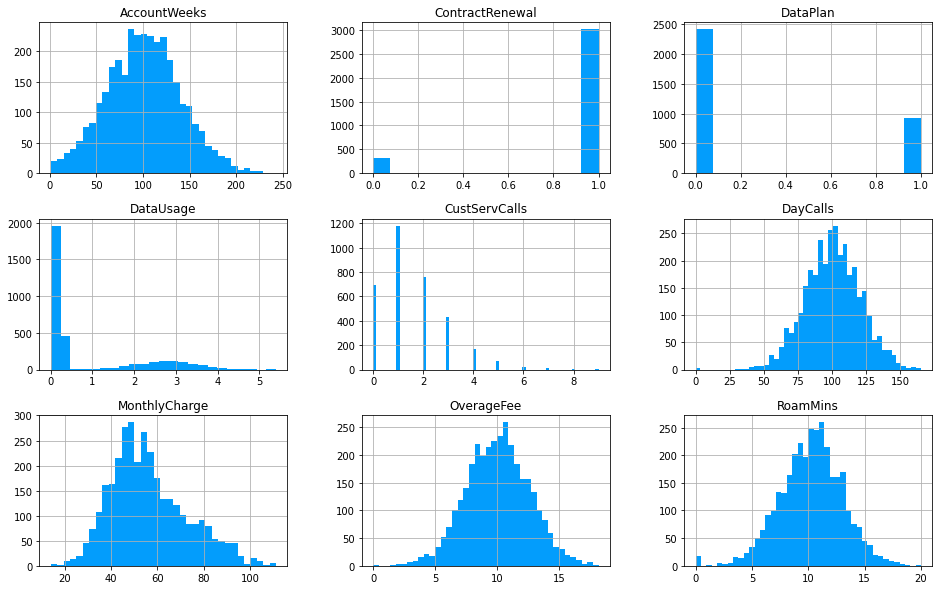

In [15]:
# Create histograms for feature columns
register_matplotlib_converters()
nrows = 3; ncols = int(round(x_df.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(16, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
columns = x_df.columns
f = 0
features = []
for i in range(nrows):
    for j in range(ncols):
        if f <= x_df.shape[1]-1:
            assetname = columns[f]
            y = x_df[assetname]
            ax[i, j].hist(y, color='#039dfc', label=assetname, bins='auto')
            f += 1
            ax[i, j].set_title(assetname)
            features.append(assetname)
            ax[i, j].grid()

plt.show()

Text(0, 0.5, 'Labels')

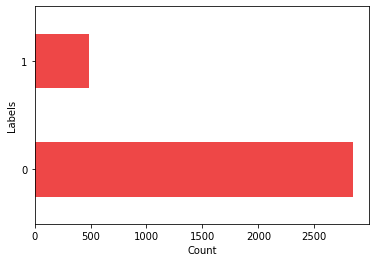

In [27]:
# Print Prediction Label
ax = y_df.value_counts(sort=False).plot(kind='barh', color='#EE4747')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

# Train a Decision Forest

In [39]:
# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)

# # Train a single random forest classifier - parameters are a best guess
# clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 100)
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

# Define parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the gridsearch
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.85426565 0.85297994 0.8534082  0.92756615 0.93056401 0.92541931
 0.92327522 0.92456094 0.92627584], using {'max_depth': 8, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057904,0.004302,0.005748,0.000384,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.854390,0.854390,0.852248,0.851931,0.858369,0.854266,0.002297,7
1,0.120259,0.004130,0.010470,0.000489,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.852248,0.852248,0.852248,0.854077,0.854077,0.852980,0.000896,9
2,0.233146,0.013313,0.018010,0.001304,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.854390,0.852248,0.852248,0.854077,0.854077,0.853408,0.000954,8
3,0.103428,0.001434,0.006691,0.000324,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.937901,0.916488,0.916488,0.929185,0.937768,0.927566,0.009581,2
4,0.201797,0.011498,0.011860,0.001105,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.942184,0.927195,0.916488,0.931330,0.935622,0.930564,0.008610,1
5,0.406335,0.030356,0.022177,0.001449,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.937901,0.920771,0.914347,0.918455,0.935622,0.925419,0.009514,4
6,0.116616,0.001704,0.007010,0.000038,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.937901,0.914347,0.916488,0.914163,0.933476,0.923275,0.010265,6
7,0.235207,0.012506,0.012583,0.000480,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.940043,0.920771,0.912206,0.922747,0.927039,0.924561,0.009123,5
8,0.470332,0.007478,0.024599,0.001836,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.935760,0.922912,0.918630,0.922747,0.931330,0.926276,0.006289,3


# Confusion Matrix

NameError: name 'tick_marks' is not defined

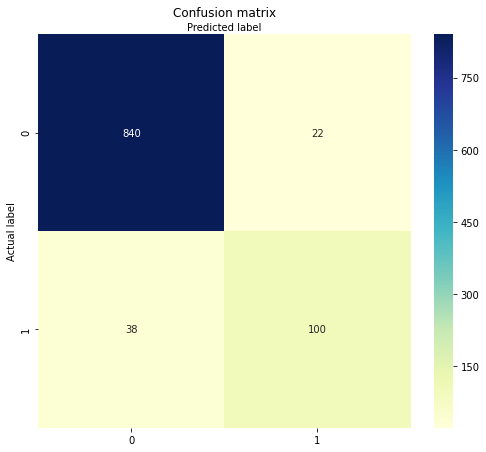

In [40]:
# # Create Confusion Matrix
# target_names = ['True', 'False']
# results_log = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
# results_df_log = pd.DataFrame(results_log).transpose()
# print(results_df_log)
# skplt.metrics.plot_confusion_matrix(y_test,  y_pred, figsize=(6,6))

# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(x_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
class_names=[False, True] 
tick_marks = [0.5, 1.5]
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)


# Best Model Feature Importance

In [21]:
r = permutation_importance(best_clf, x_test, y_test, n_repeats=30, random_state=0)
r.importances_mean


array([ 0.00000000e+00, -4.33333333e-04,  0.00000000e+00,  0.00000000e+00,
       -3.33333333e-05,  0.00000000e+00,  1.93333333e-03,  0.00000000e+00,
        3.33333333e-04])

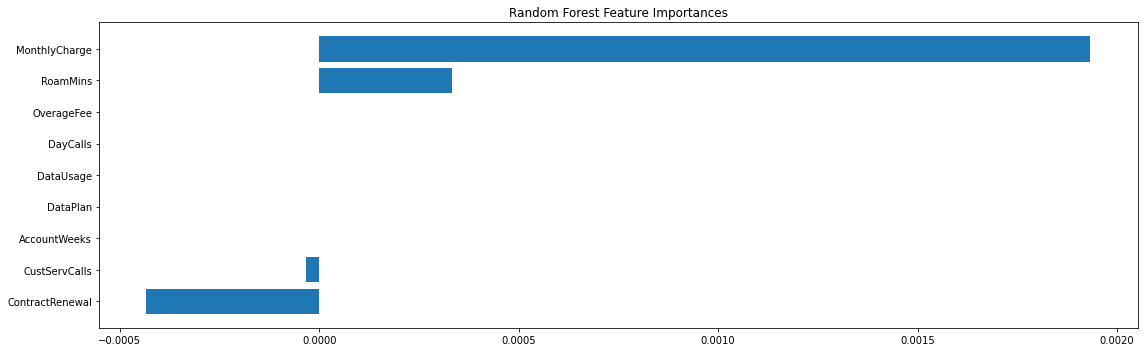

In [22]:

df = pd.DataFrame(r['importances_mean'])
df.insert(0, "Feature Names", features, True) 
df.rename(columns={0: "Importance"}, inplace = True)
df.sort_values(by=['Importance'], ascending=True, inplace = True)
y_ticks = np.arange(0, len(features))
fig, ax = plt.subplots(figsize=(16, 5))
ax.barh(y_ticks, df["Importance"])
ax.set_yticklabels(df["Feature Names"])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()